## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

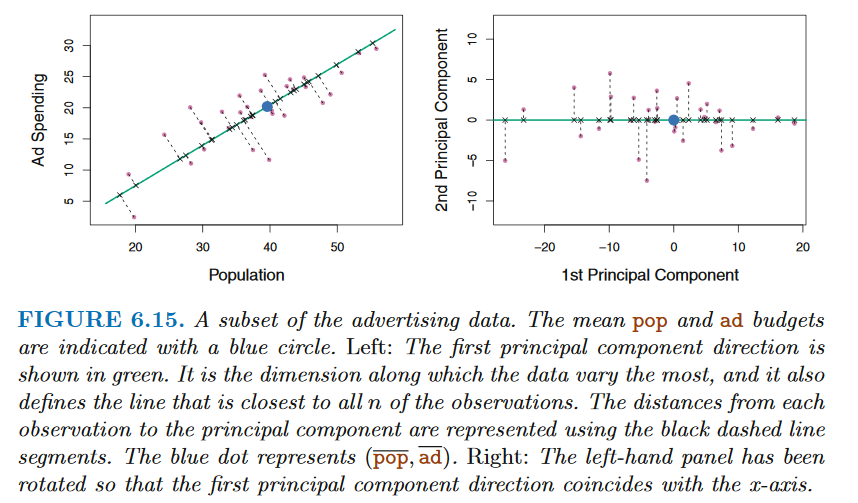

In [2]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

De esta manera se pueden construir las proyecciones de los datos $X$ en cada una de las $d$ componentes principales como:

$$z_{i1} = w_{11} x_{i1} + w_{12} x_{i2} + \cdots w_{1d} x_{id}$$
$$z_{i2} = w_{21} x_{i1} + w_{22} x_{i2} + \cdots w_{2d} x_{id}$$
$$\vdots$$
$$z_{id} = w_{d1} x_{i1} + w_{d2} x_{i2} + \cdots w_{dd} x_{id}$$

para $i=1,\cdots,n$

donde $$w_j = (w_{j1},\cdots,w_{jd}), \qquad j=1,\cdots,d$$

es el j-ésimo vector propio de la matriz de varianza empírica de $X$

de manera que $$Z_j = w_{j1} X_1 + w_{j2} X_2 + \cdots w_{jd} X_d$$ 

es la proyección de los datos en la $j-$ésima componenente principal, y se cumple que:

$$\hat{\sigma}^2(Z_1) \geq \hat{\sigma}^2(Z_2) \geq \cdots \geq \hat{\sigma}^2(Z_d)$$

**Respuesta**

Considerando $w_1$ como el primer vector propio y $w_2$ el segundo vector propio, se plantea el siguiente problema de optimización para encontrar la segunda dirección de máxima varianza

$$\max_{w_{2}} \hat{\sigma}^2(Xw_2) \quad \text{s. a} \quad \|w_2\|=1, (w_2'w_2=1)\quad y \quad w_2'w_1=0 , (ortogonalidad)$$

El Lagrangiano asociado a este problema es:

$$ L = w_2' \textstyle\hat\sum w_2 + \lambda_1\left(w_2'w_2-1\right) + \lambda_2\left(w_2'w_1-0\right)$$

Derivando el Lagrangiano respecto a $w_2$ para resolver el problema de maximización, obtenemos:

$$ \frac{\partial L}{\partial w_2} = 2 \textstyle\hat\sum w_2 - 2\lambda_1 w_2 - \lambda_2 w_1 = 0$$

Al multiplicar esta ecuación por la izquierda por $w_1'$ para aprovechar las condiciones de ortogonalidad establecidas, obtenemos:

$$ 2 w_1' \textstyle\hat\sum w_2 -2\lambda_1 w_1'w_2 - \lambda_2w_1'w_1 = 0$$ 

Aplicando la condición de ortogonalidad entre los dos primeros vectores propios, además de las condiciones de la primera iteración para el primer vector propio $w_1'w_1=1, \textstyle\hat\sum w_1 = \lambda w_1$ obtenemos:

$$ 2 w_1' \textstyle\hat\sum w_2 = \lambda_2 $$

Desarrollando y aplicando propiedades del álgebra lineal, llegamos a:

$$ 2 w_2'\textstyle \hat\sum w_1 = \lambda_2 $$

$$ 2 w_2' \lambda w_1 = \lambda_2 $$

$$ 2 \lambda w_2' w_1 = \lambda_2 \rightarrow \lambda_2 = 0$$

Reemplazando en $\frac{\partial L}{\partial w_2}$:

\begin{align}
2 \textstyle\hat\sum w_2 - 2\lambda_1 w_2 &= 0 \\
\textstyle\hat\sum w_2 &= \lambda_1 w_2 
\end{align}

Así, tenemos que $w_2$ es un vector propio de $\textstyle\hat\sum$, entonces

$$ \hat\sigma^2 (Xw_2) = w_2'\textstyle\hat\sum w_2 = w_2'\lambda_1 w_2 = \lambda_1$$

Con esto, se puede concluir que la segunda dirección de máxima varianza está asociada al segundo vector propio $w_2$, cuyo valor es el segundo mayor valor propio en $\lambda_1$.

En general, a i-ésima dirección esta asociada al i-ésimo vector propio, cuyo valor está asociado al i-ésimo de mayor valor en $\lambda$, siendo estos vectores todos ortogonales entre sí.

#### Ejercicio 2:
Muestre que $S$, la varianza empírica total de los datos $X$ cumple:
$$S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) = \sum_{j=1}^d \hat{\sigma}^2(Z_j)$$

###### Indicación:
Utilice la propiedad de la descomposición de una matriz $A$ en valores y vectores propios que establece que la traza de $A$ es igual a la suma de sus valores propios.

**Respuesta**

De lo anterior, mediante operaciones elementales matriciales podemos llegar a que $S$ es equivalente a $\sum_{j=1}^d \hat{\sigma}^2(X_j)$, que puede ser una matriz diagonal que contiene las varianzas por cada columna (variable). Así, si tenemos una matriz de vectores propios $W$:

$$\sum_{j=1}^d \hat{\sigma}^2(X_j) = traza(\hat\Sigma)$$ 

con

$$ S = traza (\hat\Sigma) $$

Por ortogonalidad, sabemos que $W'W=I$, así:

$$ \sum_{j=1}^d \hat{\sigma}^2(X_j) = traza(W' \hat\Sigma W) = traza(\Lambda) $$

De los cálculos anteriores, se puede deducir que 

$$W' \hat\Sigma W = \sum_{j=1}^d \hat{\sigma}^2(Z_j) $$

#### Selección del número de componentes principales
La propiedad anterior genera un criterio para decidir el número de componentes principales a considerar en función del porcentaje de varianza explicada. En efecto, la proporción de varianza explicada (PVE) por la m-ésima componente principal se puede calcular como:
$$PVE = \frac{\hat{\sigma}^2(Z_m)}{\sum_{j=1}^d \hat{\sigma}^2(X_j)}= \frac{ \sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{ \sum_{j=1}^d \sum_{i=1}^n{x_{ij}}^2}$$

De la demostración previa se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [3]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


### Análisis Exploratorio de Datos

corrplot 0.92 loaded



     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

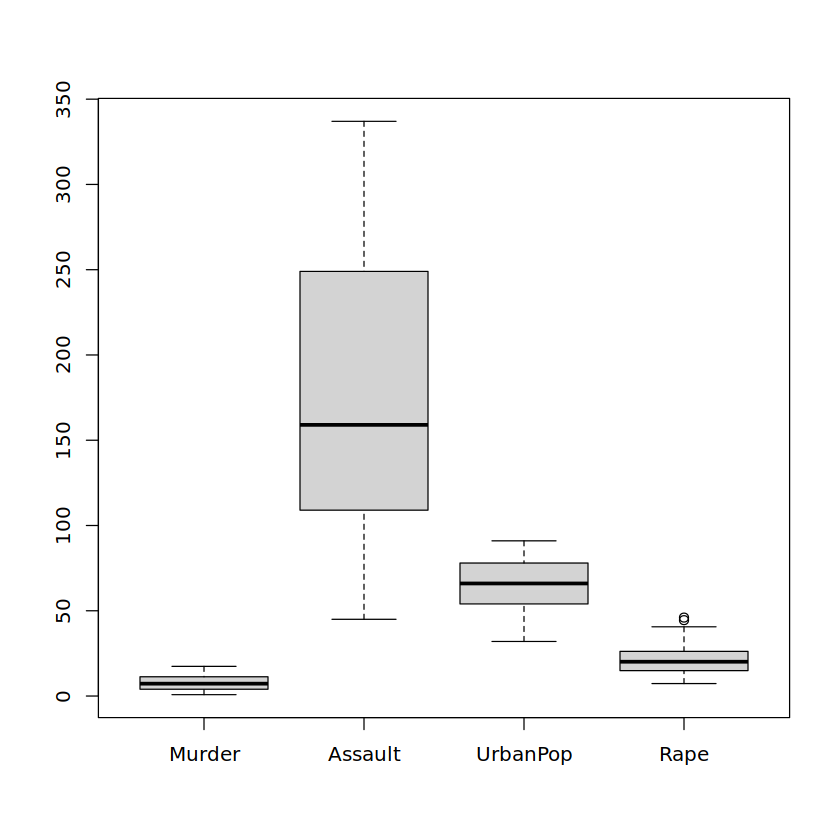

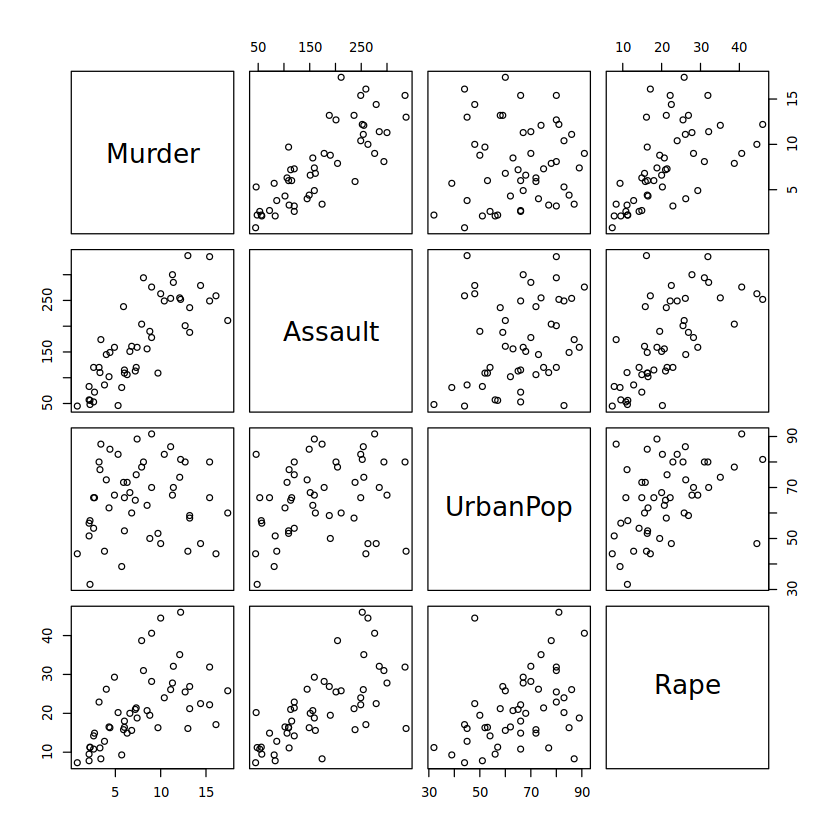

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


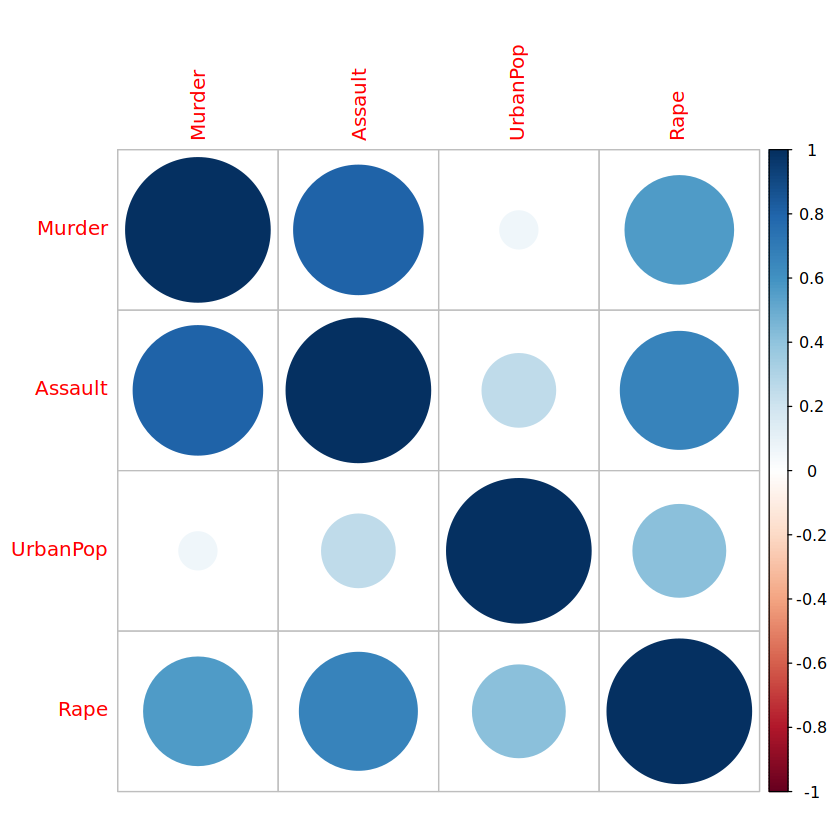

In [4]:
#install.packages('corrplot')
library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
corrplot(mcor)
print(mcor)



In [5]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)



Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

In [6]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)

apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, si las escalas son comparables, el escalado puede no ser deseable, como se muestra en el ejemplo siguiente:


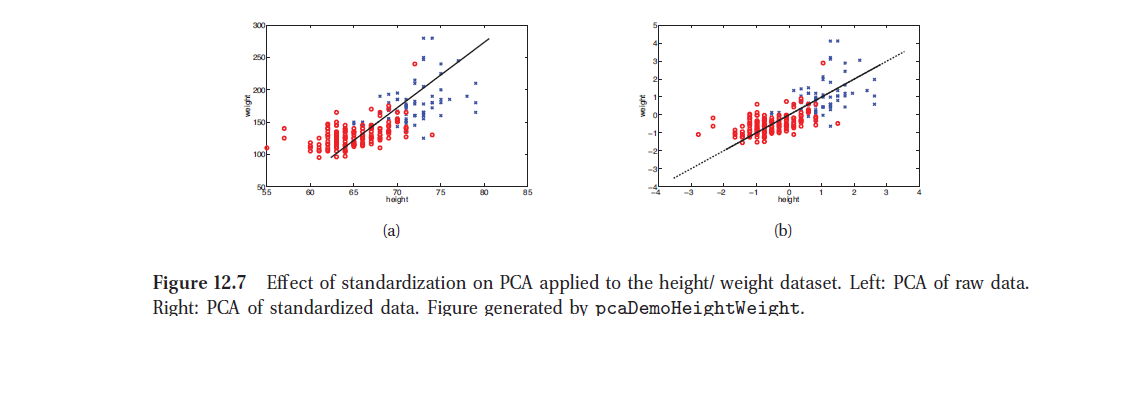

In [7]:
display_png(file="figura2.png")

En el caso de los datos en análisis, las variables Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, es decir se encuentran en la misma escala, no asi UrbanPop que se mide como un porcentaje de la población total. Y es por esto que hemos decidido escalar los datos.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA  dependerán de si las variables se han escalado individualmente o no.

In [8]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [9]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [10]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”


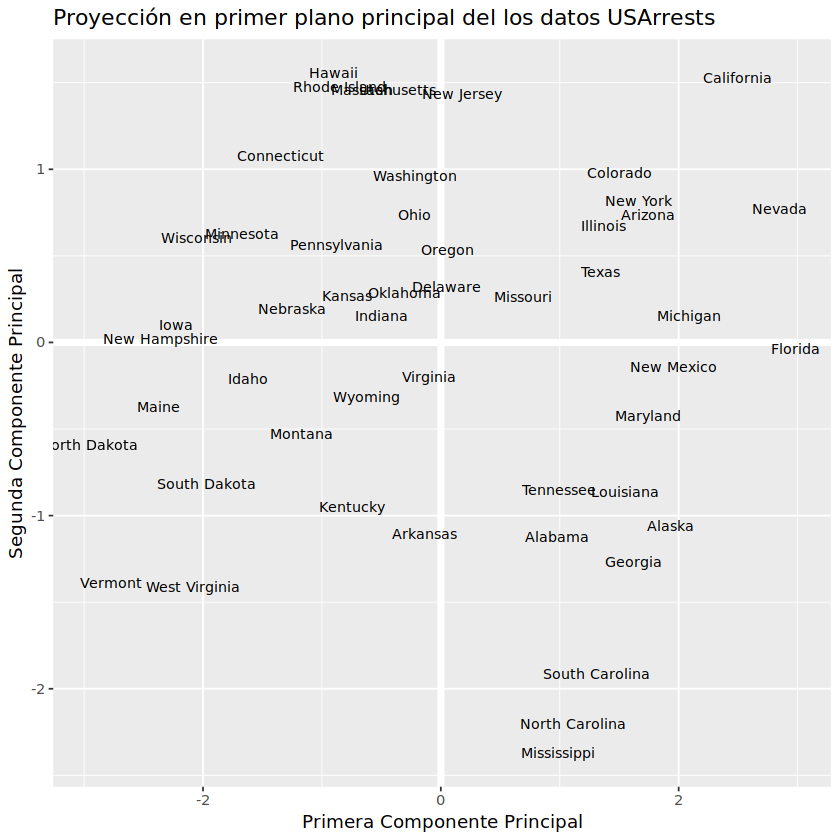

In [11]:
#install.packages('ggplot2')
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

In [12]:
#Cálculo de la varianza explicada
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

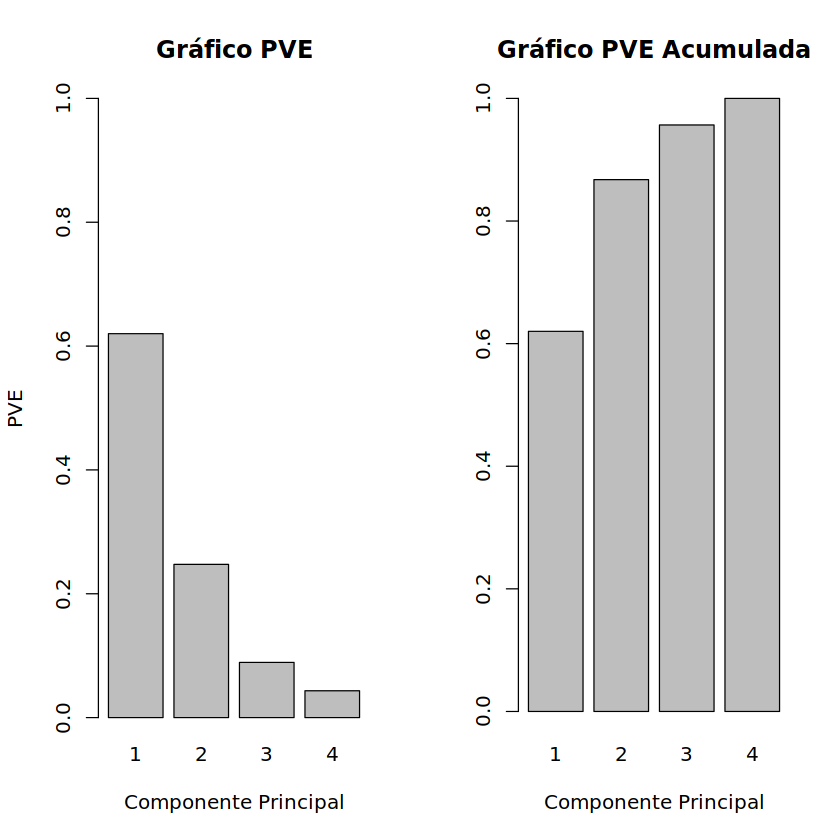

In [13]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [14]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

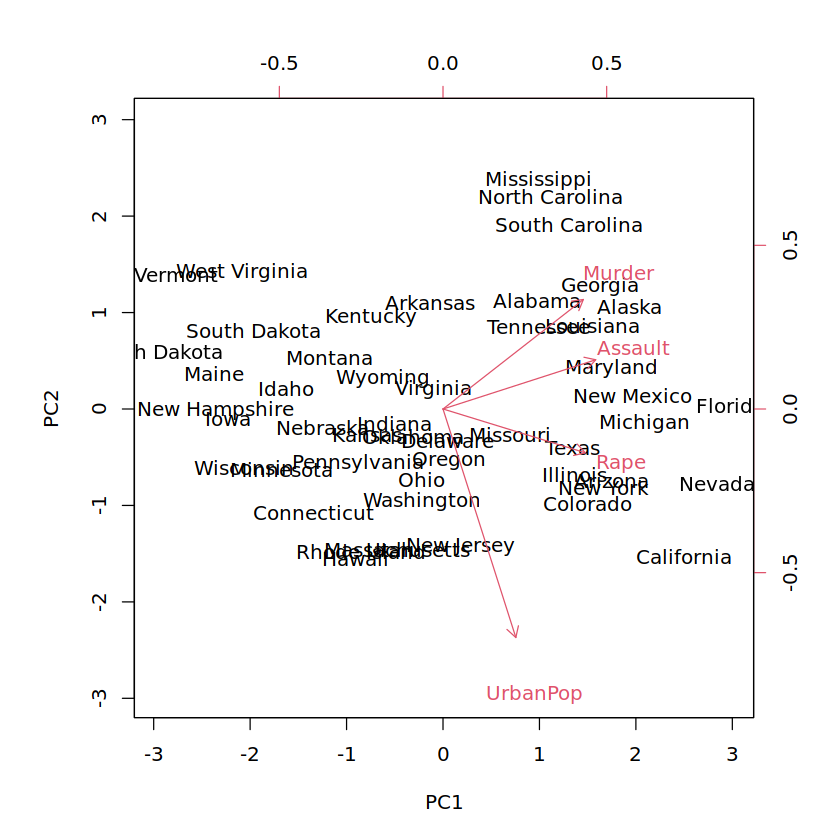

In [15]:
biplot(pca_res, scale = 0)

#### Ejercicio 3:
1. Explique como se obtienen las coordenadas de  variables y observaciones en este último gráfico y como se interpreta la representación obtenida.




,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


State,PC1,PC2
<chr>,<dbl>,<dbl>
Alabama,0.97566045,-1.12200121
Alaska,1.93053788,-1.06242692
Arizona,1.74544285,0.73845954
Arkansas,-0.13999894,-1.10854226
California,2.49861285,1.52742672
Colorado,1.49934074,0.97762966
Connecticut,-1.34499236,1.07798362
Delaware,0.04722981,0.32208890
Florida,2.98275967,-0.03883425


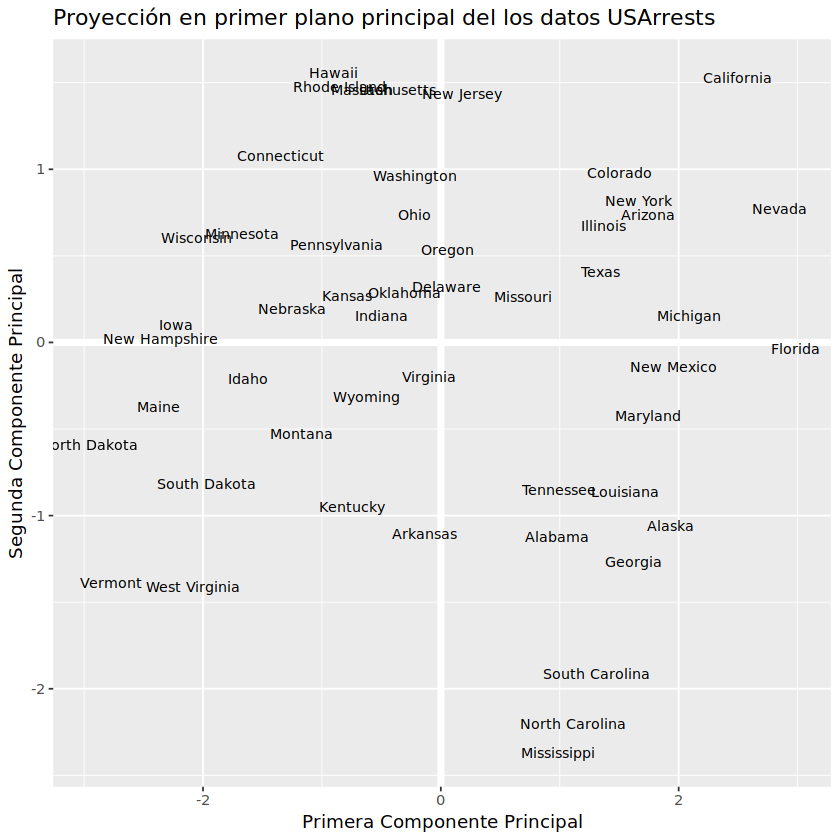

In [16]:
#Respuesta
#Las coordenadas de las variables se obtienen con:
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w

#Las coordenadas de las ciudades se obtienen con:
PC

#Y las observaciones de las ciudades se obtienen con:
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

#Análisis
#Análisis
#En el gráfico, la dirección de los vectores rojos indica dónde ocurren más arrestos por el delito correspondiente. 
#En la dirección opuesta, hay menos arrestos de ese tipo. Por ejemplo, en Georgia, con menor población que Nueva York,
#predominan los arrestos por asesinato. En Virginia, con baja densidad poblacional, hay menos arrestos en general. 
#En California, con alta población, predominan los arrestos por violaciones.
#Las ciudades cercanas comparten cifras similares de arrestos,
#como aquellas cercanas a Nueva York con altos arrestos por violaciones y densidad urbana.

2. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 

In [17]:
#Respuesta
#Datos sin prcomp
arrests.cov <- cov(scaled_df)
arrests.cov

#Datos con prcomp
pca_res <- prcomp(USArrests, scale = TRUE)
pca_res

#En la matriz de datos, las filas representan los diferentes motivos de asaltos en Estados Unidos,
#mientras que las columnas indican cómo cada motivo se relaciona con los vectores del análisis de componentes principales (PCA).
#La función prcomp() automáticamente calcula las componentes principales,
#mientras que escala los datos centrando las variables en una media cero y una desviación estándar de uno.
#Esto asegura que todas las variables contribuyan equitativamente al análisis, independientemente de su escala original.
#En la próxima pregunta, se detallarán todos los argumentos disponibles en la función prcomp.

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995 -0.4181809  0.3412327  0.64922780
Assault  -0.5831836 -0.1879856  0.2681484 -0.74340748
UrbanPop -0.2781909  0.8728062  0.3780158  0.13387773
Rape     -0.5434321  0.1673186 -0.8177779  0.08902432

3. Utilice la función predefinida en R princomp y compare con prcomp.

In [18]:
#Respuesta
#prcomp
pca <- prcomp(USArrests, scale = TRUE)
summary(pca)

#princomp con datos estandarizados
pca2 <- princomp(USArrests, cor = TRUE)
summary(pca2)

#Ambas funciones calculan los componentes principales, nos muestra una tabla con información sobre la varianza por cada componente, así como los valores propios, 
#los vectores propios.

#"prcomp" tiene el argumento "scale" que escala los datos de USArrests
#"princomp" siempre escala los datos, por lo que no se le asigna el argumento "scale"
#La función "prcomp" por defecto utiliza la matriz de covarianza para el cálculo de los componentes principales.
#"princomp" necesita el argumento "cor" para calcular la matriz de covarianza y utilizarla para el cálculo de los componentes principales.

#Argumentos de prcomp
#pca <- prcomp(USArrests, scale = TRUE, center = TRUE, retx = TRUE, 
#              rank. = NULL, tol = NULL, linfct = NULL, x = FALSE, 
#              covmat = NULL, singular.ok = TRUE)

#USArrests: conjunto de datos numericos 
#scale: un valor lógico que indica si se debe estandarizar la matriz de datos antes de realizar el análisis de componentes principales.
#center: un valor lógico que indica si se debe centrar la matriz de datos antes de realizar el análisis de componentes principales.
#retx: un valor lógico que indica si se deben devolver los datos transformados por los componentes principales.
#rank., tol, linfct: argumentos relacionados con el cálculo de los valores singulares de la matriz.
#x: establecido en NULL, lo que significa que la matriz de datos debe proporcionarse directamente como el primer argumento de la función.
#covmat: una matriz de covarianza alternativa para usar en lugar de la matriz de covarianza calculada a partir de los datos.
#singular.ok: un valor lógico que indica si se deben permitir valores singulares cero.

#Argumentos de princomp
#pca2 <- princomp(USArrests, cor = TRUE, scores = TRUE, covmat = NULL, 
#                 subset = NULL, na.action = na.omit)



#USArrests:  un conjunto de datos numéricos.
#cor: un valor lógico que indica si se debe utilizar la matriz de correlación en lugar de la matriz de covarianza.
#scores: un valor lógico que indica si se deben devolver los valores de los componentes principales para cada observación.
#covmat: una matriz de covarianza alternativa para usar en lugar de la matriz de covarianza calculada a partir de los datos.
#subset: un vector lógico que indica qué filas deben ser incluidas en el análisis.
#na.action: una función que se utilizará para manejar los valores faltantes en los datos.

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

#### Ejercicio 4:
Considere los datos adjuntos provenientes de una muestra de canciones de spotify, recolectadas por kaggle.com, que incluye para cada canción 11 características (columnas 4 a la 14). Se trata de realizar un análisis exploratorio de estos datos incluyendo un PCA. 

Entre las características disponibles hay algunas que son calculadas por el propio algoritmo de Spotify, y por lo tanto, tienen cierto grado de subjetividad, como son: acousticness, danceability, energy, instrumentalness, liveness, speechiness y valence.

Por otra parte hay otras variables objetivas como duration_ms, tempo y loudness. Son atributos de una canción que no están sujetos a interpretación del algoritmo. Por ejemplo, la duración es la que tenga la pista y el tempo será el que determine un metrónomo.

Por último se consigna la variable popularity, cuyo valor está basado en datos reales de reproducción, pero ponderada por la cercanía en el tiempo (reproducciones más recientes tienen mayor peso a la hora de calcular la popularidad).



In [19]:
library(ggplot2)
datos <-read.csv("../data/tiposMusica.csv",dec=".",sep=";",header=TRUE)
print(datos[1:10,])

       genre             artist_name
1  Classical Wolfgang Amadeus Mozart
2  Classical Wolfgang Amadeus Mozart
3  Classical Wolfgang Amadeus Mozart
4  Classical   Fr\x82d\x82ric Chopin
5  Classical   Fr\x82d\x82ric Chopin
6  Classical   Fr\x82d\x82ric Chopin
7  Classical    Ludwig van Beethoven
8  Classical    Ludwig van Beethoven
9  Classical   Johann Sebastian Bach
10 Classical   Johann Sebastian Bach
                                                                    track_name
1                                 Grabmusik, K. 42: III. Geliebte Seel' (Live)
2          Requiem in D Minor, K. 626: IIIb. Sequence No. 2, Tuba mirum (Live)
3                                   12 Duets (No. 10 Andante) - Violin Version
4                                      Mazurkas, Op. 50: No. 2 in A-Flat Major
5                     M\x82lodies Polonaises, Op. 74: No. 9, Melodia (Lamento)
6                           Preludes, Op. 28: No. 12 in G-Sharp Minor (Presto)
7                   Fidelio, Op. 72, Act

i) Realice un análisis exploratorio de los datos de las 11 características de las canciones (columnas 4 a la 14), incluyendo resúmenes de cada variable, boxplots, correlaciones y análisis de componentes principales (PCA).

ii) Interprete sus resultados en (i). Indique cual es el interés de utilizar PCA en este conjunto de datos y si se sugiere algún tipo de limpieza de datos a partir del análisis realizado.

   popularity     acousticness       danceability     duration_ms    
 Min.   : 0.00   Min.   :0.000051   Min.   :0.0685   Min.   : 31787  
 1st Qu.:29.00   1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787  
 Median :41.00   Median :0.816000   Median :0.3770   Median :210960  
 Mean   :38.83   Mean   :0.609778   Mean   :0.3926   Mean   :219232  
 3rd Qu.:53.00   3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773  
 Max.   :74.00   Max.   :0.996000   Max.   :0.8650   Max.   :865940  
     energy        instrumentalness     liveness         loudness      
 Min.   :0.00211   Min.   :0.00000   Min.   :0.0504   Min.   :-46.122  
 1st Qu.:0.07260   1st Qu.:0.00315   1st Qu.:0.0995   1st Qu.:-24.606  
 Median :0.25500   Median :0.47500   Median :0.1150   Median :-14.592  
 Mean   :0.35131   Mean   :0.45033   Mean   :0.1789   Mean   :-17.134  
 3rd Qu.:0.59700   3rd Qu.:0.89300   3rd Qu.:0.1570   3rd Qu.: -9.127  
 Max.   :0.97700   Max.   :0.95800   Max.   :0.9720   Max.   : -0.747  
  spee

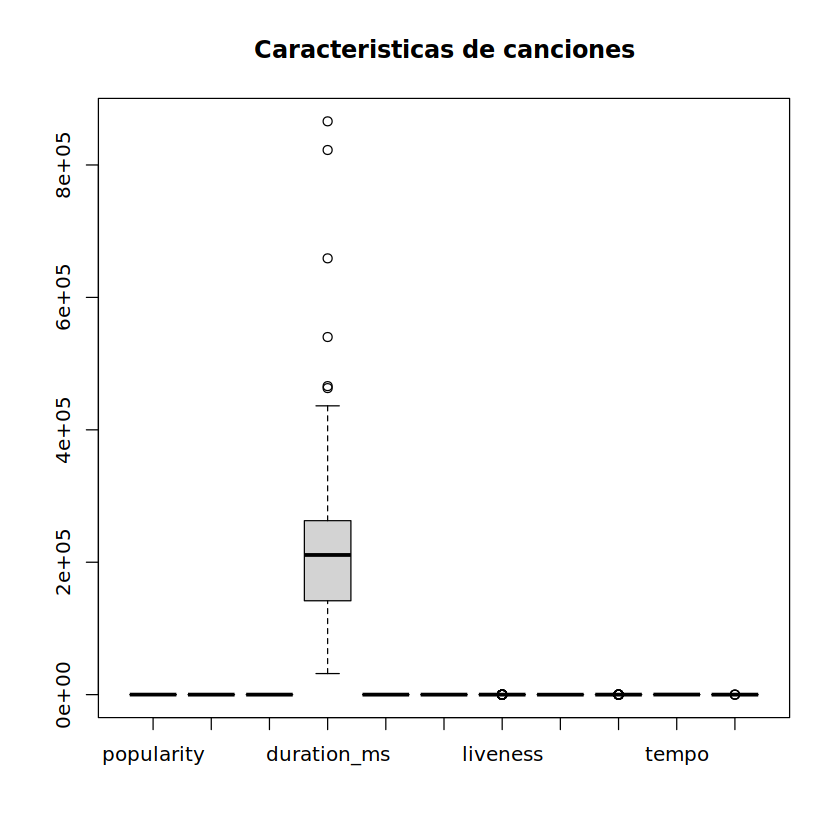

In [20]:
#Respuesta
library(ggplot2)
library(corrplot)
library(stats)

songs <- datos[,4:14]

summary(songs)
boxplot(songs,main="Caracteristicas de canciones")

Con summary obtenemos un resumen de los datos, mientras que con bloxpot obtenemos la dispersion de las caracteristicas de las canciones. Notando que la caracteristicas mas dispersa es la duracion de estas.

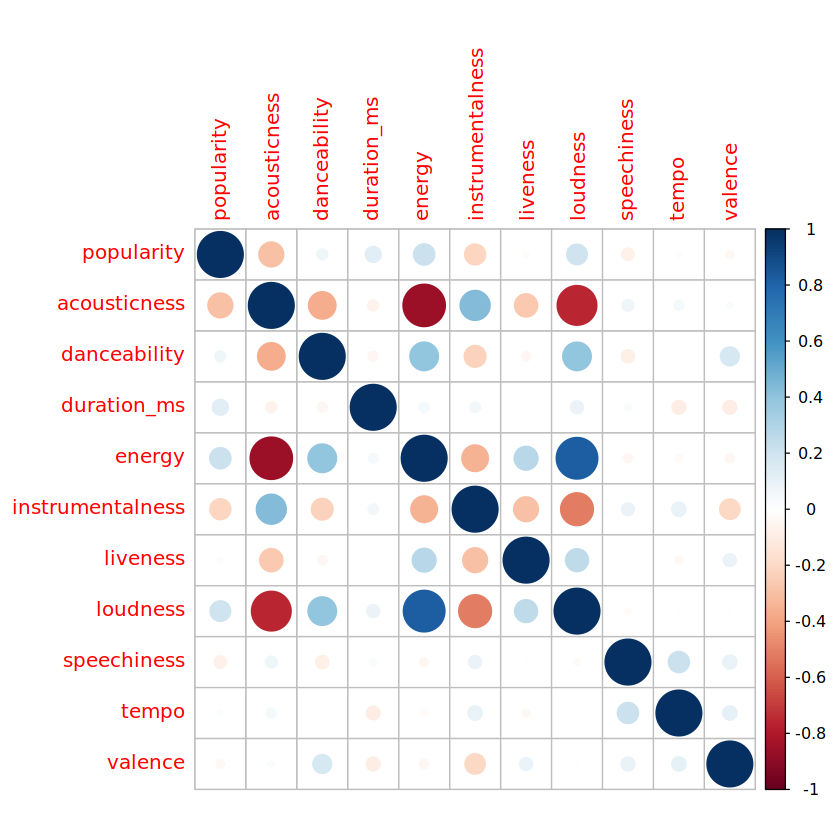

In [21]:
# Correlaciones
songs_matrix<- cor(songs)
corrplot(songs_matrix)

In [22]:
# Calculo de varianza
apply(songs, 2, var)
apply(songs, 2, mean)

songs_scaled <- apply(songs, 2, scale)
head(songs_scaled)
apply(songs_scaled, 2, var)

apply(songs_scaled, 2, mean)

popularity     acousticness     danceability      duration_ms 
    3.554919e+02     1.645395e-01     3.164554e-02     1.665968e+10 
          energy instrumentalness         liveness         loudness 
    9.100875e-02     1.612471e-01     2.665673e-02     1.023674e+02 
     speechiness            tempo          valence 
    1.185599e-03     7.236191e+02     5.846910e-02

popularity     acousticness     danceability      duration_ms 
    3.883221e+01     6.097781e-01     3.925517e-01     2.192315e+05 
          energy instrumentalness         liveness         loudness 
    3.513117e-01     4.503350e-01     1.788933e-01    -1.713442e+01 
     speechiness            tempo          valence 
    5.357181e-02     1.029541e+02     2.707966e-01

popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
-1.3170449,0.8190174,-0.23919961,-1.0838764,-0.9122740,-1.121475,-0.1402183,-0.4811959,-0.5335597,1.3787990,-0.9987295
-1.3700827,0.9398157,-0.88003816,0.3236052,-0.9149258,-1.113631,-0.5701839,-0.6026665,-0.3186467,0.7441933,0.1207729
-1.9534980,0.9472116,-0.85755259,-1.3266317,-0.3325140,1.264245,-0.4709610,0.5756674,-0.4115821,-0.1382918,-0.4582088
-0.3623653,0.9521421,-0.03120815,-0.6425736,-1.0909422,1.174594,-0.3607135,-1.2225717,2.5100736,0.3496605,-0.8357876
-0.5214786,0.9472116,-0.19422848,-0.5042481,-0.4849952,-1.121439,-0.1830924,0.3505169,-0.3070298,-0.5672111,1.0223301
-0.7336296,0.9447463,0.43536728,-1.1485378,-0.4883100,1.157162,-0.3729632,-0.4479867,0.3406136,1.3123682,-0.9553059


popularity     acousticness     danceability      duration_ms 
               1                1                1                1 
          energy instrumentalness         liveness         loudness 
               1                1                1                1 
     speechiness            tempo          valence 
               1                1                1

popularity     acousticness     danceability      duration_ms 
   -9.839026e-17    -1.947362e-17    -9.835387e-17     9.170067e-17 
          energy instrumentalness         liveness         loudness 
   -7.817880e-17    -3.378563e-17     3.681521e-17    -1.349672e-16 
     speechiness            tempo          valence 
   -2.388446e-17    -4.471097e-17    -8.721424e-17

In [23]:
#matriz de covarianza
songs_cov <- cov(songs_scaled)

songs_eigen <- eigen(songs_cov)

songs_eigen

eigen() decomposition
$values
 [1] 3.3599123 1.3522620 1.1767559 1.0891475 0.9790349 0.9136051 0.7350638
 [8] 0.5578389 0.5137836 0.2216331 0.1009627

$vectors
             [,1]        [,2]       [,3]         [,4]        [,5]        [,6]
 [1,]  0.19022911 -0.22783795 -0.2387117 -0.152748359  0.62945651 -0.49306185
 [2,] -0.48991707  0.06597132  0.1101955  0.014974507  0.11187943  0.03350649
 [3,]  0.27731758  0.17649875  0.1119936 -0.562624930 -0.06518522  0.33721129
 [4,]  0.03522357 -0.38653400 -0.3879865  0.203270907  0.39488605  0.57362244
 [5,]  0.48914341 -0.04307714 -0.1438224 -0.021119101 -0.24142920  0.02864797
 [6,] -0.34369932 -0.14659056 -0.2963609 -0.162317663 -0.31315412  0.11220924
 [7,]  0.20343619  0.12674065  0.1993243  0.723303125 -0.07162547 -0.09847098
 [8,]  0.49042831  0.01215258 -0.1041046  0.008193751 -0.11927601  0.06093162
 [9,] -0.05832152  0.40558025 -0.5474100  0.238096946 -0.04144121  0.24626456
[10,] -0.03983957  0.46738568 -0.4945972 -0.101021624 -0.046

In [24]:
w <- -songs_eigen$vectors[,1:2] 
row.names(w) <- colnames(songs)

#vector propio 1 y 2
colnames(w) <- c("PC1", "PC2")

w


,PC1,PC2
popularity,-0.19022911,0.22783795
acousticness,0.48991707,-0.06597132
danceability,-0.27731758,-0.17649875
duration_ms,-0.03522357,0.38653400
energy,-0.48914341,0.04307714
instrumentalness,0.34369932,0.14659056
liveness,-0.20343619,-0.12674065
loudness,-0.49042831,-0.01215258
speechiness,0.05832152,-0.40558025
tempo,0.03983957,-0.46738568


In [25]:
PC1 <- as.matrix(songs_scaled) %*% w[,1]
PC2 <- as.matrix(songs_scaled) %*% w[,2]

id <- seq_len(nrow(songs)) #ID para canciones, ya que el nombre genero problemas de UTF
# Proyeccion
PC <- data.frame(ID_Song=id, PC1, PC2)
head(PC)

,ID_Song,PC1,PC2
,<int>,<dbl>,<dbl>
1,1,1.1422894,-0.7560133
2,2,1.4366548,-0.5058991
3,3,1.5182682,-0.1462939
4,4,2.3681708,-0.8961126
5,5,0.2737698,-0.7153461
6,6,1.5616940,-0.7428972


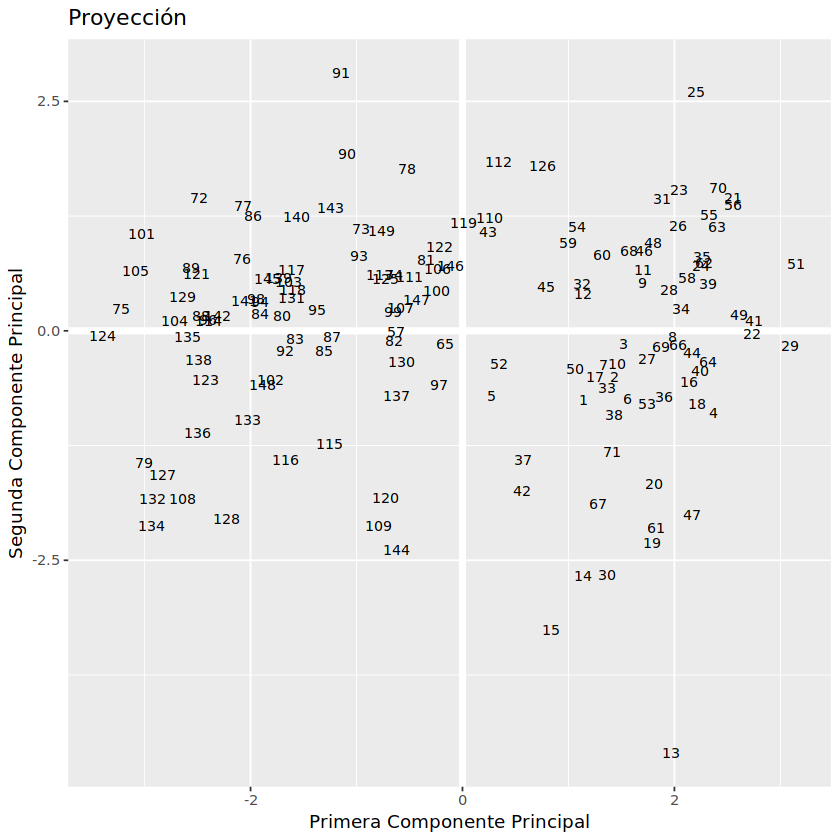

In [26]:
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = ID_Song), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección")

In [27]:
PVE <- songs_eigen$values / sum(songs_eigen$values)
round(PVE, 2)

[1] 0.31 0.12 0.11 0.10 0.09 0.08 0.07 0.05 0.05 0.02 0.01

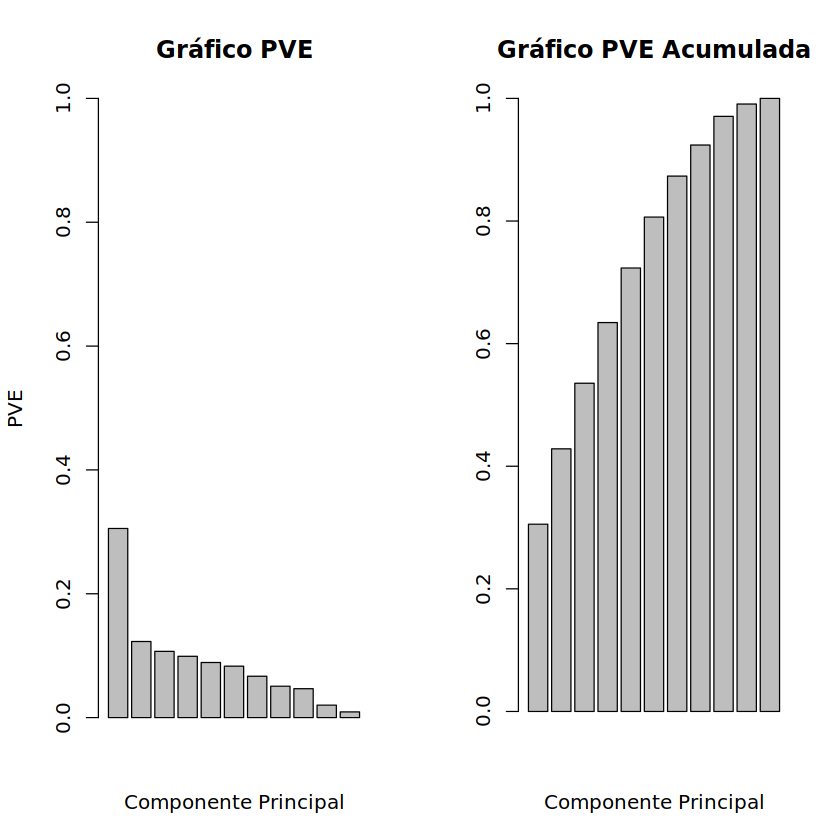

In [28]:
# GráficoPVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada")

Notese que la primera componente principal marca el 31%, mientras que la segunda el 12% arpox. Explicando el 41% de variavilidad
